In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
os.path.dirname(sys.executable)
sys.path.append('/scratch/users/gsoykan20/projects/AF-GAN/')

In [3]:
from utils.structs.metric_recorder import load_metric_recorder
from face_recognition import *
from utils.datetime_utils import get_dt_string
from utils.logging_utils import *

from data.datasets.ssupergan_dataset import SSGANDataset
from data.datasets.golden_faces import GoldenFacesDataset

In [4]:
# visualize_data()

In [5]:
initiate_logger()

In [6]:
ptu.set_gpu_mode(True)

In [7]:
model = torch.load("../results/02-05-2021-22-35-31_fr_model.pth")
model = model.to(ptu.device)

In [11]:
compute_mean_acc(model, datasource_mode=DataSourceMode.TEST)

Started to compute accuracy for model
Batch mean acc: 111 / 128
Batch mean acc: 111 / 128
Batch mean acc: 114 / 128
Batch mean acc: 108 / 128
Batch mean acc: 111 / 128
Batch mean acc: 112 / 128
Batch mean acc: 116 / 128
Batch mean acc: 111 / 128
Batch mean acc: 113 / 128
Batch mean acc: 119 / 128
Batch mean acc: 109 / 128
Batch mean acc: 114 / 128
Batch mean acc: 115 / 128
Batch mean acc: 109 / 128
Batch mean acc: 112 / 128
Batch mean acc: 118 / 128
Batch mean acc: 117 / 128
Batch mean acc: 115 / 128
Batch mean acc: 114 / 128
Batch mean acc: 109 / 128
Batch mean acc: 113 / 128
Batch mean acc: 109 / 128
Batch mean acc: 115 / 128
Batch mean acc: 109 / 128
Batch mean acc: 116 / 128
Batch mean acc: 113 / 128
Batch mean acc: 114 / 128
Batch mean acc: 106 / 128
Batch mean acc: 114 / 128
Batch mean acc: 120 / 128
Batch mean acc: 118 / 128
Batch mean acc: 121 / 128
Batch mean acc: 111 / 128
Batch mean acc: 110 / 128
Batch mean acc: 113 / 128
Batch mean acc: 110 / 128
Batch mean acc: 117 / 128


KeyboardInterrupt: 

### RUNNING FACE RECOGNITION MODEL ON GOLDEN AGE FACES

In [18]:
config = read_config(Config.VAE)
golden_age_config = read_config(Config.GOLDEN_AGE)

train_dataset = GoldenFacesDataset(
golden_age_config.faces_path, config.image_dim, limit_size=config.num_training_samples, augment=False)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=False)
    
test_dataset = GoldenFacesDataset(
golden_age_config.faces_path, config.image_dim, limit_size=config.num_test_samples, augment=False)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False)

dataiter = iter(test_dataloader)

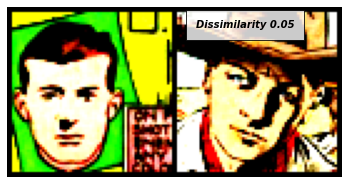

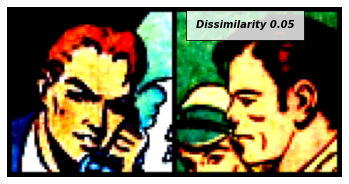

In [ ]:
model.eval()
max_display = None
data_length = len(dataiter)
threshold = 0.05
for i in range(data_length):
    if max_display != None and i > max_display:
        break
    batch = next(dataiter)
    x0, x1 = torch.chunk(batch, 2)
    x0 = x0.to(ptu.device)
    x1 = x1.to(ptu.device)
    labels = ptu.zeros_like(x0)
    concatenated = torch.cat((x0, x1), 0)
    output1, output2, _ = model((x0, x1, labels))
    euclidean_distance = F.pairwise_distance(output1, output2)
    if euclidean_distance.item() < threshold:
        imshow(torchvision.utils.make_grid(concatenated), 'Dissimilarity {:.2f}'.format(euclidean_distance.item()))
    #print('original label: ' + str(ptu.get_numpy(labels)))

In [ ]:
model = train_siamese(get_dt_string() + "_model")

In [ ]:
compute_mean_acc(model, datasource_mode = DataSourceMode.TRAIN)

In [ ]:
compare_test_set(model, max_display=20)

In [ ]:
mr = load_metric_recorder("28-04-2021-20-58-01")